In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Dataset

In [2]:
file_path = 'path/to/EastWestAirlines.xlsx'
excel_data =pd.read_excel(r"C:\Users\Sanjith\Desktop\Assignment 7\EastWestAirlines.xlsx")
excel_file = pd.ExcelFile(r"C:\Users\Sanjith\Desktop\Assignment 7\EastWestAirlines.xlsx")  

In [6]:
print(excel_file.sheet_names)

['Description', 'data']


In [10]:
print("Available sheet names:", excel_file.sheet_names)

Available sheet names: ['Description', 'data']


In [11]:
data_df = excel_file.parse('data')

# Initial Data Inspection

In [13]:
print("Missing values:\n", data_df.isnull().sum())

Missing values:
 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [14]:
print("Summary statistics:\n", data_df.describe())

Summary statistics:
                ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000

In [15]:
data_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
 # Data Preprocessing

In [16]:
data_df = data_df.dropna()

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df.drop(columns=['ID#', 'Award?']))

In [ ]:
# Exploratory Data Analysis (EDA)

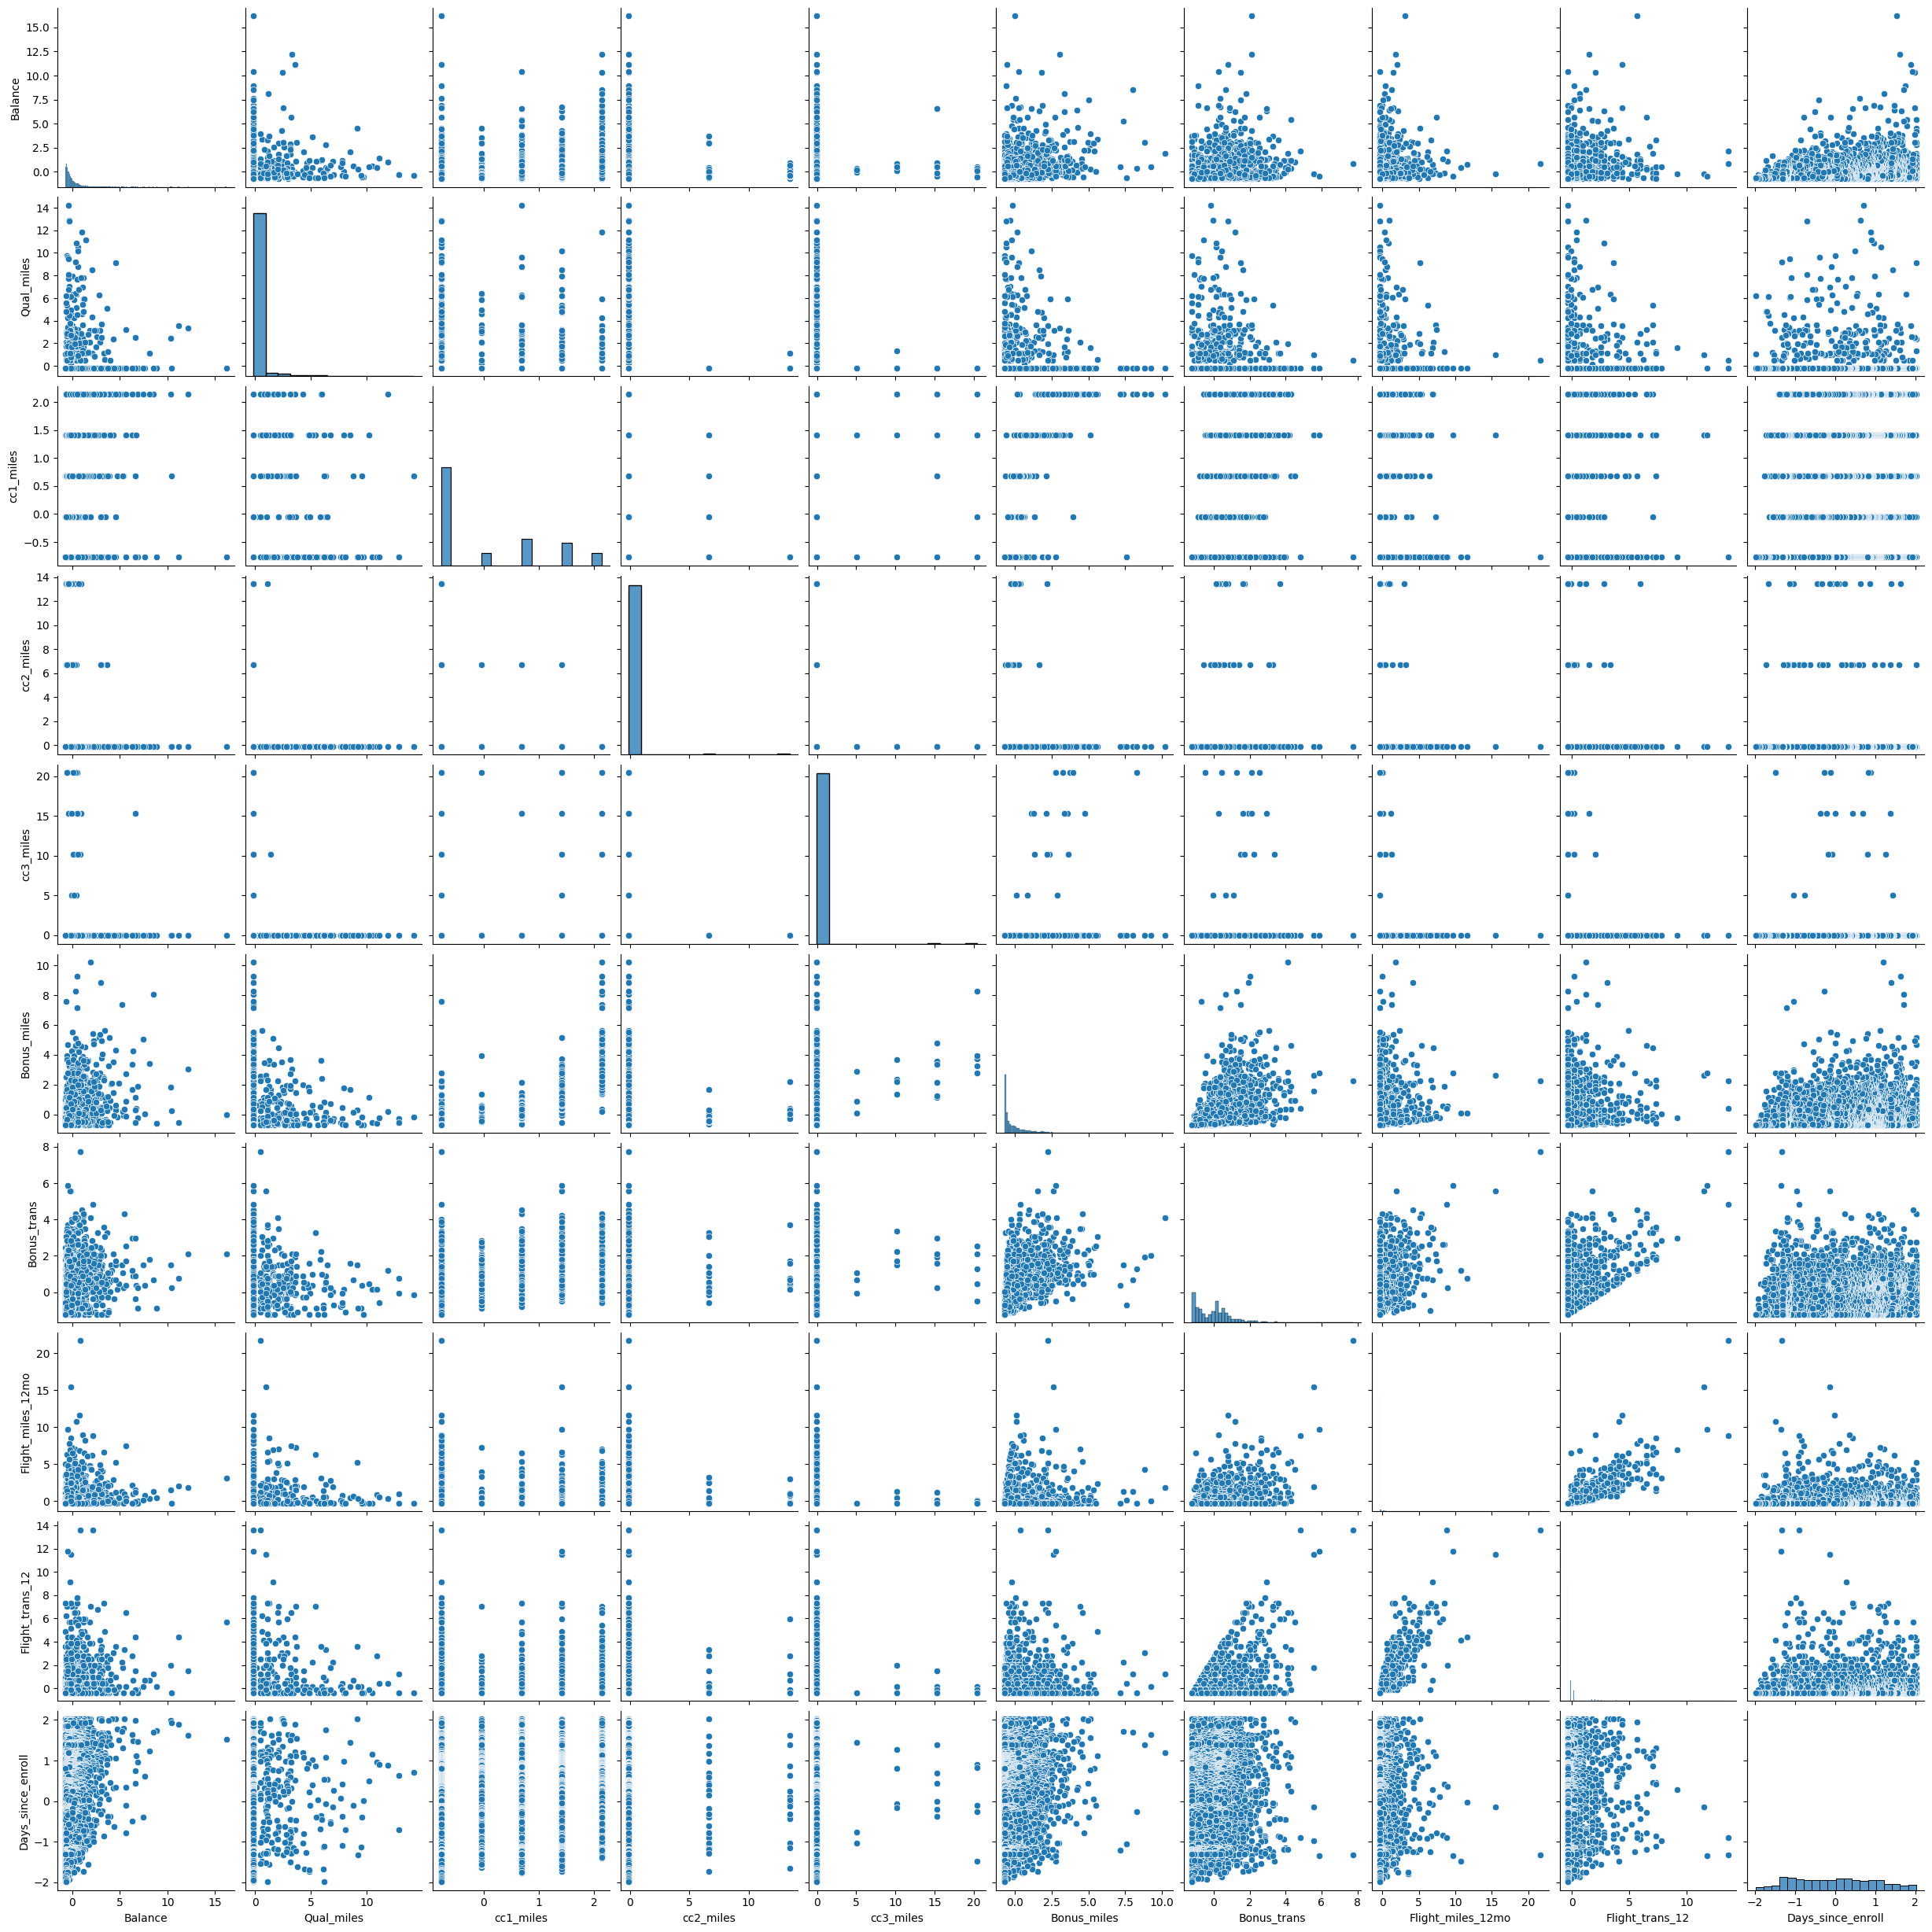

In [18]:
sns.pairplot(pd.DataFrame(data_scaled, columns=data_df.columns[1:-1]))
plt.show()

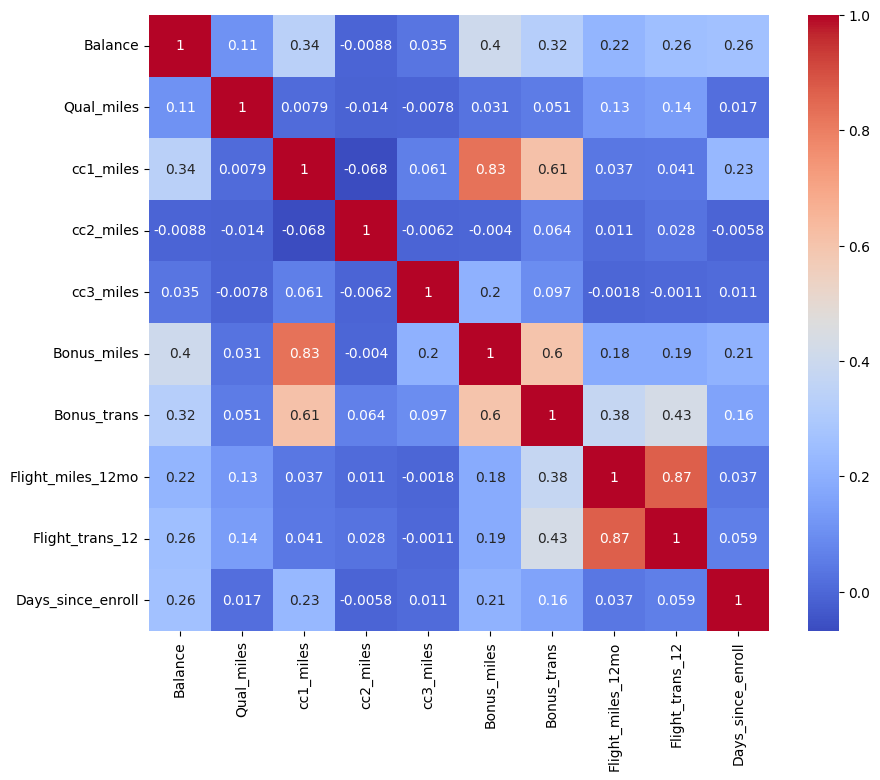

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(data_scaled, columns=data_df.columns[1:-1]).corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Implementing Clustering Algorithms

In [20]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

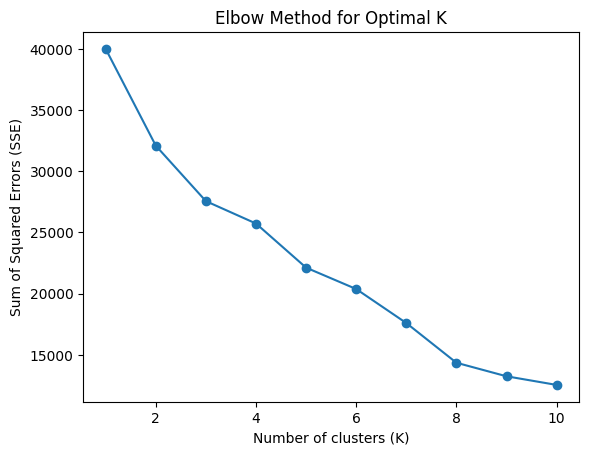

In [21]:
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [22]:
optimal_k = 4  # Set this based on the elbow plot result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
print(f'Silhouette Score for K-Means: {silhouette_score(data_scaled, kmeans_labels)}')

Silhouette Score for K-Means: 0.2758185306810566


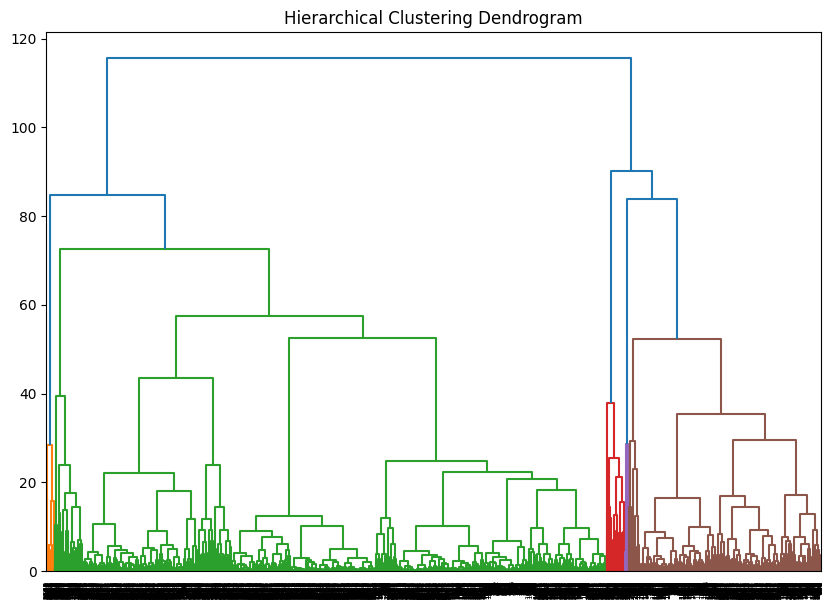

In [23]:
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [24]:
agglo = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agglo_labels = agglo.fit_predict(data_scaled)
print(f'Silhouette Score for Hierarchical: {silhouette_score(data_scaled, agglo_labels)}')

Silhouette Score for Hierarchical: 0.3350233247024554


In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

In [26]:
mask = dbscan_labels != -1
print(f'Silhouette Score for DBSCAN: {silhouette_score(data_scaled[mask], dbscan_labels[mask])}')

Silhouette Score for DBSCAN: 0.10802454017973835


In [ ]:
# Cluster Analysis and Interpretation

In [27]:
data_with_clusters = pd.DataFrame(data_scaled, columns=data_df.columns[1:-1])
data_with_clusters['Cluster'] = kmeans_labels
cluster_summary = data_with_clusters.groupby('Cluster').mean()
cluster_summary

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Cluster,,,,,,,,,,
0,-0.323186,-0.050512,-0.731755,-0.085756,-0.060406,-0.575317,-0.659389,-0.171748,-0.187445,-0.236267
1,1.352160,0.109657,1.802987,-0.098242,0.559717,2.120923,1.070977,0.071326,0.099078,0.620696
2,1.004868,0.854643,-0.018523,0.086074,-0.062767,0.473216,1.615576,3.719282,4.014305,0.233447
3,0.015148,-0.046104,0.682557,0.164913,-0.062767,0.265044,0.598561,-0.157122,-0.172870,0.181202


In [ ]:
# Visualization of Clusters

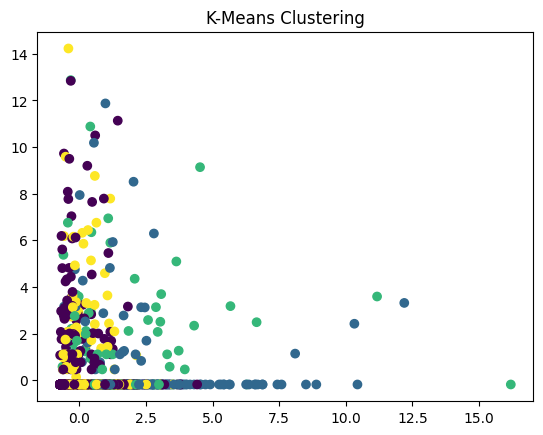

In [28]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.show()

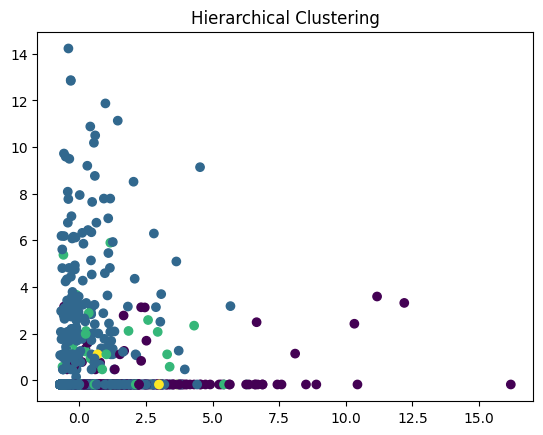

In [29]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=agglo_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.show()

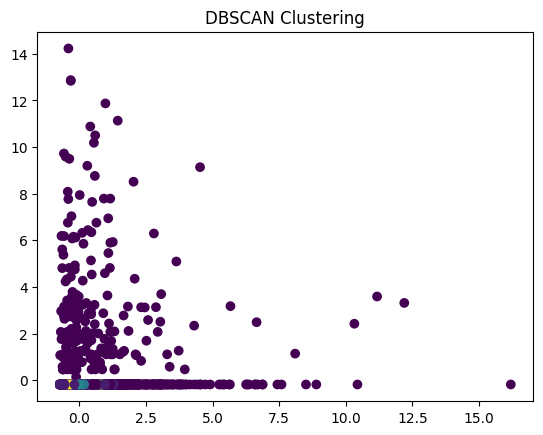

In [30]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
# Evaluation and Comparison

In [31]:
print("Silhouette Score for K-Means:", silhouette_score(data_scaled, kmeans_labels))
print("Silhouette Score for Hierarchical:", silhouette_score(data_scaled, agglo_labels))
print("Silhouette Score for DBSCAN (filtered):", silhouette_score(data_scaled[mask], dbscan_labels[mask]))

Silhouette Score for K-Means: 0.2758185306810566
Silhouette Score for Hierarchical: 0.3350233247024554
Silhouette Score for DBSCAN (filtered): 0.10802454017973835
